Vamos a realizar peticiones y transformaciones sobre datos de la siguiente api:

https://newcastle.urbanobservatory.ac.uk/api_docs/

## Ejercicio 1

Familiarizarse con la api del Urban Observatory y realizar una petición sencilla

In [1]:
import requests
import pandas as pd

url = 'https://newcastle.urbanobservatory.ac.uk/api/v1.1/sensors/json/'
peticion_sencilla = requests.get(url, verify=False)

if peticion_sencilla.status_code == 200:
    datos = peticion_sencilla.json()
else:
    print('Ha habido un problema en la recolección de datos')

C:\Desarrollos\ISDI\ISDI-API\.venv\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'newcastle.urbanobservatory.ac.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [2]:
df_sensores = pd.json_normalize(datos['sensors'])

## Ejercicio 2

Objetivo: Obtener datos de sensores meteorológicos y realizar un análisis básico.

Utiliza el endpoint específico para obtener datos de temperatura, humedad, o viento.
Almacena los datos en un DataFrame de Pandas.
Calcula medidas estadísticas básicas (media, mediana, máximo, mínimo).


In [3]:
url = 'https://newcastle.urbanobservatory.ac.uk/api/v1.1/sensors/data/json/'
params = {'last_n_days': 1, 'data_variable': 'Temperature'}
sensores_temperatura = requests.get(url, params=params, verify=False)

C:\Desarrollos\ISDI\ISDI-API\.venv\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'newcastle.urbanobservatory.ac.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [4]:
df_temperaturas = pd.DataFrame(sensores_temperatura.json()['sensors'])

In [5]:
df_temperaturas = df_temperaturas[df_temperaturas['data'] != {}]

In [6]:
df_temperaturas_organizada = pd.json_normalize(df_temperaturas['data'])

In [7]:
dato_columna = df_temperaturas_organizada['Temperature']

# 2. Expandir cada elemento de la lista en una fila separada.
dato_expandido = [item for sublist in dato_columna for item in sublist]

# 3. Convertir los elementos expandidos en un nuevo DataFrame.
df_expandido = pd.DataFrame(dato_expandido)

In [8]:
df_expandido.count()

Flagged as Suspect Reading    16696
Sensor Name                   16696
Variable                      16696
Value                         16696
Units                         16696
Timestamp                     16696
dtype: int64

In [9]:
df_expandido.Timestamp = pd.to_datetime(df_expandido.Timestamp, unit='ms')

In [10]:
df_expandido.describe()

,Value,Timestamp
count,16696.000000,16696
mean,5.065522,2024-01-06 01:44:57.903449856
min,-0.700000,2024-01-05 14:08:00
25%,2.600000,2024-01-05 19:53:00
50%,5.000000,2024-01-06 01:44:00
75%,6.000000,2024-01-06 07:35:00
max,16.600000,2024-01-06 13:48:00
std,3.488625,NaN


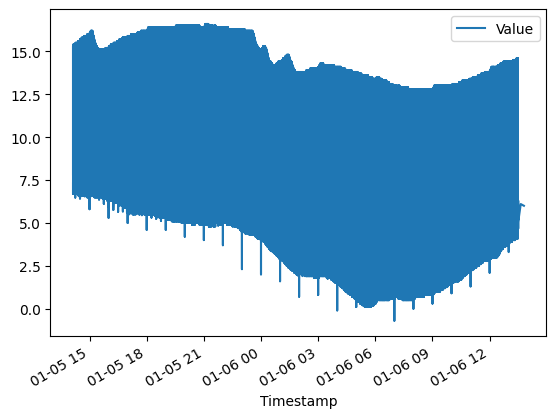

In [11]:
# Visualizacion
import matplotlib.pyplot as plt

df_expandido.plot(x='Timestamp', y='Value')
plt.show()

## Ejercicio 3

Obtén datos de tráfico de un sensor específico.
Almacena los datos en un DataFrame y convierte las marcas de tiempo al formato correcto.
Grafica la cantidad de vehículos detectados por hora a lo largo del día

In [12]:
url_trafico = "https://newcastle.urbanobservatory.ac.uk/api/v1.1/sensors/data/json/"
params = {
    'last_n_days': 1,
    'theme': 'Traffic'
}

try:
    respuesta_trafico = requests.get(url_trafico, params=params, verify=False)
    respuesta_trafico.raise_for_status()
except requests.exceptions.HTTPError as httpError:
    print ("Http Error:", httpError)
except requests.exceptions.ConnectionError as conError:
    print ("Error Connecting:", conError)
except requests.exceptions.Timeout as timeError:
    print ("Timeout Error:", timeError)
except requests.exceptions.RequestException as err:
    print ("OOps: Something Else", err)

C:\Desarrollos\ISDI\ISDI-API\.venv\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'newcastle.urbanobservatory.ac.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [23]:
df_trafico = pd.DataFrame(respuesta_trafico.json()['sensors'])

In [25]:
df_trafico = df_trafico[df_trafico['data'] != {}]

In [26]:
df_trafico.head()

,Third Party,Broker Name,Sensor Name,Raw ID,Sensor Centroid Latitude,Ground Height Above Sea Level,Sensor Height Above Ground,Location (WKT),data,Sensor Centroid Longitude
1,{'0': False},{'0': 'NE Travel Data API'},{'0': 'PER_NE_R9800XSIYQIAX'},{'0': '79695'},{'0': 54.7695608414},{'0': 75.6600036621},{'0': 2.0},{'0': 'LINESTRING (-1.5999684517758 54.7672553...,{'Journey Time': [{'Flagged as Suspect Reading...,{'0': -1.5973886894}
5,{'0': False},{'0': 'NE Travel Data API'},{'0': 'PER_NE_CAJT_SLA690_BPR1_DR2'},{'0': '457'},{'0': 54.8978913121},{'0': 44.5900001526},{'0': 2.0},{'0': 'LINESTRING (-1.38995639179549 54.902599...,{'Plates In': [{'Flagged as Suspect Reading': ...,{'0': -1.3963419298}
6,{'0': False},{'0': 'NE Travel Data API'},{'0': 'PER_NE_CAJT_NTMENGLN_NRHMRD_WAGNWE'},{'0': '80017'},{'0': 55.0193778085},{'0': 66.6800003052},{'0': 2.0},"{'0': 'LINESTRING (-1.490871992 55.021063963, ...",{'Plates In': [{'Flagged as Suspect Reading': ...,{'0': -1.493817898}
13,{'0': False},{'0': 'NE Travel Data API'},{'0': 'PER_NE_CAJT_SLA183_B3_CR2'},{'0': '445'},{'0': 54.8973466049},{'0': 77.6699981689},{'0': 2.0},{'0': 'LINESTRING (-1.43294636201527 54.894055...,{'Plates In': [{'Flagged as Suspect Reading': ...,{'0': -1.4211578712}
15,{'0': False},{'0': 'NE Travel Data API'},{'0': 'PER_NE_CAJT_STB1298_SR2_SR3'},{'0': '476'},{'0': 54.9759476136},{'0': 13.5},{'0': 2.0},{'0': 'LINESTRING (-1.43507033596858 54.977351...,{'Plates In': [{'Flagged as Suspect Reading': ...,{'0': -1.4376365104}


In [58]:
df_trafico_organizada = pd.json_normalize(df_trafico['data'])
columna_conteo = df_trafico_organizada['Plates In']
columna_conteo.dropna(inplace=True)
columna_conteo.head()

# 2. Expandir cada elemento de la lista en una fila separada.
dato_expandido_trafico = [item for sublist in columna_conteo for item in sublist]

# 3. Convertir los elementos expandidos en un nuevo DataFrame.
df_expandido_trafico = pd.DataFrame(dato_expandido_trafico)

In [59]:
df_expandido_trafico['Sensor Name'].unique()

array(['PER_NE_CAJT_SLA690_BPR1_DR2',
       'PER_NE_CAJT_NTMENGLN_NRHMRD_WAGNWE', 'PER_NE_CAJT_SLA183_B3_CR2',
       'PER_NE_CAJT_STB1298_SR2_SR3', 'PER_NE_CAJT_SLA1018_WW_NBS1',
       'PER_NE_CAJT_STA184_AR4_A1018NR3', 'PER_NE_CAJT_SLA1018_CR3_CK4',
       'PER_NE_CAJT_GHA184_A167_PR', 'PER_NE_CAJT_NCA695_SWR3_SB',
       'PER_NE_CAJT_GHA184_A1114_A184', 'PER_NE_CAJT_NTA187_A186_HDRSTN',
       'PER_NE_CAJT_STB1298_SR3_SR2_BUS',
       'PER_NE_CAJT_NTCRHLST_A193_A1058',
       'PER_NE_CAJT_NCA188_CR3_BR4_BUS', 'PER_NE_CAJT_NCA189_JDR4_SL6',
       'PER_NE_CAJT_NCB1318_GNR1_GNR0_BUS', 'PER_NE_CAJT_NTA1058_CR4_CR5',
       'PER_NE_CAJT_NTA189_SPR6B_MF8', 'PER_NE_CAJT_NTA1058_CR5_CR4',
       'PER_NE_CAJT_SLHYLTONRD_1_2', 'PER_NE_CAJT_NTA187_HDRSTN_A186',
       'PER_NE_CAJT_NCA189_SJB1_SJB2', 'PER_NE_CAJT_NTA188_BR6_BR5',
       'PER_NE_CAJT_NTA188_SPR6B_BR6', 'PER_NE_CAJT_NTA1058_BR6_CR5',
       'PER_NE_CAJT_SLA183_CR4_B3', 'PER_NE_CAJT_NCA189_JDR4_GNR0',
       'PER_NE_CAJT_STA101

In [60]:
df_expandido_trafico['Timestamp'] = pd.to_datetime(df_expandido_trafico['Timestamp'], unit='ms')
df_expandido_trafico_sensor_unico = df_expandido_trafico[df_expandido_trafico['Sensor Name'] == 'PER_NE_CAJT_SLA1018_WW_NBS1']

In [61]:
df_expandido_trafico_sensor_unico.count()

Flagged as Suspect Reading    360
Sensor Name                   360
Variable                      360
Value                         360
Units                         360
Timestamp                     360
dtype: int64

In [62]:
df_expandido_trafico_sensor_unico['Value'].sum()

8548.0

In [63]:
df_expandido_trafico_sensor_unico.set_index('Timestamp', inplace=True)  


In [70]:
df_expandido_trafico_sensor_unico

,Flagged as Suspect Reading,Sensor Name,Variable,Value,Units
Timestamp,,,,,
2024-01-05 14:11:00,False,PER_NE_CAJT_SLA1018_WW_NBS1,Plates In,65.0,Vehicles
2024-01-05 14:15:00,False,PER_NE_CAJT_SLA1018_WW_NBS1,Plates In,59.0,Vehicles
2024-01-05 14:19:00,False,PER_NE_CAJT_SLA1018_WW_NBS1,Plates In,58.0,Vehicles
2024-01-05 14:23:00,False,PER_NE_CAJT_SLA1018_WW_NBS1,Plates In,65.0,Vehicles
2024-01-05 14:27:00,False,PER_NE_CAJT_SLA1018_WW_NBS1,Plates In,44.0,Vehicles
...,...,...,...,...,...
2024-01-06 13:51:00,False,PER_NE_CAJT_SLA1018_WW_NBS1,Plates In,30.0,Vehicles
2024-01-06 13:55:00,False,PER_NE_CAJT_SLA1018_WW_NBS1,Plates In,23.0,Vehicles
2024-01-06 13:59:00,False,PER_NE_CAJT_SLA1018_WW_NBS1,Plates In,17.0,Vehicles


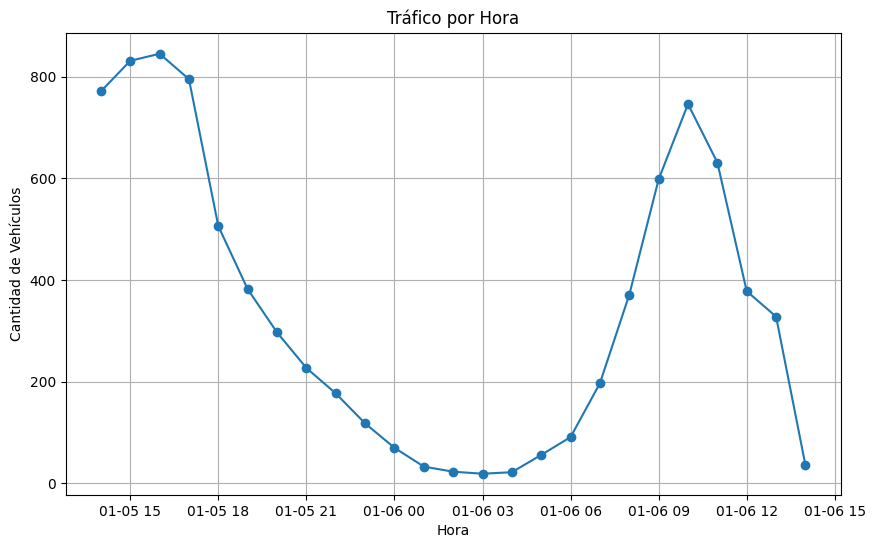

In [72]:

# Agrupa y cuenta las entradas por hora
df_resampled = df_expandido_trafico_sensor_unico.resample('H').sum()

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(df_resampled['Value'], marker='o', linestyle='-')
plt.title('Tráfico por Hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad de Vehículos')
plt.grid(True)
plt.show()

## Ejercicio 4

Utiliza una biblioteca de Python para visualización de mapas como Folium.
Representa la ubicación de los sensores en un mapa y colorea o dimensiona los marcadores según la intensidad de un factor específico (por ejemplo, la contaminación).
Crea un mapa interactivo que permita a los usuarios explorar los diferentes datos

In [80]:
params = {
    'last_n_days': 3,  # Últimos 3 días de datos
    'data_variable': 'Temperature',  # Variable de datos: Temperatura
}

# Hacer la petición a la API
response = requests.get("https://newcastle.urbanobservatory.ac.uk/api/v1.1/sensors/data/json/", params=params, verify=False)

# Verificar que la petición fue exitosa
if response.status_code == 200:
    data = response.json()
    print("Datos recogidos exitosamente!")
else:
    print("Error en la petición:", response.status_code)


C:\Desarrollos\ISDI\ISDI-API\.venv\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'newcastle.urbanobservatory.ac.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Datos recogidos exitosamente!


In [81]:
data

{'sensors': [{'Sensor Name': {'0': 'PER_EML_EML_SENSORS_154406'},
   'Ground Height Above Sea Level': {'0': 55.4700012207},
   'Sensor Height Above Ground': {'0': 2.0},
   'Sensor Centroid Latitude': {'0': 54.98167},
   'Location (WKT)': {'0': 'POINT (-1.61309 54.98167)'},
   'Third Party': {'0': False},
   'Sensor Centroid Longitude': {'0': -1.61309},
   'Raw ID': {'0': '1003'},
   'Broker Name': {'0': 'EML 3d wind sensor'},
   'data': {}},
  {'Sensor Name': {'0': 'PER_WUNDERGROUND_INORTHSH5'},
   'Ground Height Above Sea Level': {'0': 36.2299995422},
   'Sensor Height Above Ground': {'0': 2.0},
   'Sensor Centroid Latitude': {'0': 55.006157},
   'Location (WKT)': {'0': 'POINT (-1.459279 55.006157)'},
   'Third Party': {'0': True},
   'Sensor Centroid Longitude': {'0': -1.459279},
   'Raw ID': {'0': '1374'},
   'Broker Name': {'0': 'Wunderground API'},
   'data': {}},
  {'Sensor Name': {'0': 'PER_EMOTE_2408'},
   'Ground Height Above Sea Level': {'0': 57.5099983215},
   'Sensor Height

In [83]:
# Asegúrate de que 'data' contiene la respuesta de la API
if 'data' in locals():
    # Convertir los datos JSON en un DataFrame
    df = pd.json_normalize(data['sensors'])
    print("Datos cargados en DataFrame:")
    print(df.head())  # Mostrar las primeras filas del DataFrame
else:
    print("Primero asegúrate de recoger los datos correctamente.")


Datos cargados en DataFrame:
                Sensor Name.0  Ground Height Above Sea Level.0  \
0  PER_EML_EML_SENSORS_154406                        55.470001   
1  PER_WUNDERGROUND_INORTHSH5                        36.230000   
2              PER_EMOTE_2408                        57.509998   
3              PER_EMOTE_2606                        59.459999   
4              PER_EMOTE_1903                        54.380001   

   Sensor Height Above Ground.0  Sensor Centroid Latitude.0  \
0                           2.0                   54.981670   
1                           2.0                   55.006157   
2                           2.0                   54.979084   
3                           2.0                   54.976282   
4                           2.0                   54.973043   

                    Location (WKT).0  Third Party.0  \
0          POINT (-1.61309 54.98167)          False   
1        POINT (-1.459279 55.006157)           True   
2        POINT (-1.617592 54.9

In [89]:
df.dropna(inplace=True)

In [90]:
import folium
#54.580244 - 55.286919
#-2.106543 -1.210895
if 'df' in locals():
    mapa = folium.Map(location=[(54.580244 + 55.286919) / 2, (-2.106543 -1.210895) / 2], zoom_start=12)
    
    for index, row in df.iterrows():
        folium.Marker(location=[row['Sensor Centroid Latitude.0'], row['Sensor Centroid Longitude.0']], popup=row['Ground Height Above Sea Level.0']).add_to(mapa)
    
    mapa.save('sensor_map.html')